In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# Создание объекта MinMaxScaler
scaler = MinMaxScaler()

# Ввод датасета
data = pd.read_csv('CellPhone.csv')
dataset = data


#Выделите только числовые столбцы
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('price_range')
normalized_data = scaler.fit_transform(data[numeric_columns])
dataset = pd.DataFrame(normalized_data, columns=numeric_columns)
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.052632,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.000000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.105263,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.000000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.684211,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0


In [2]:
# Порог для определения категориального признака (подберите его в зависимости от вашего датасета)
threshold = 2

# Получение списка категориальных признаков на основе количества уникальных значений
categorical_features = [column for column in dataset.columns if dataset[column].nunique() <= threshold]

# Вывод списка категориальных признаков
print("Категориальные признаки:", categorical_features)

Категориальные признаки: ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']


In [3]:
print(data.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [4]:
from ucimlrepo import fetch_ucirepo 
from hw3code import DecisionTree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.simplefilter("ignore")
import numpy as np
from importlib import reload
import hw3code
reload(hw3code)

# Получаем признаки и целевую переменную
x = dataset
y = data['price_range']
features = []

# Преобразуем категориальные признаки с помощью LabelEncoder
for column in categorical_features:
    le = LabelEncoder()
    le.fit(x[column])
    x[column] = le.transform(x[column])

for col in x:
    if col in categorical_features:
        # print(col)
        features.append('categorical')
    else:
        features.append('real')

x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


Построим график зависимости количества ближайших соседа к точности

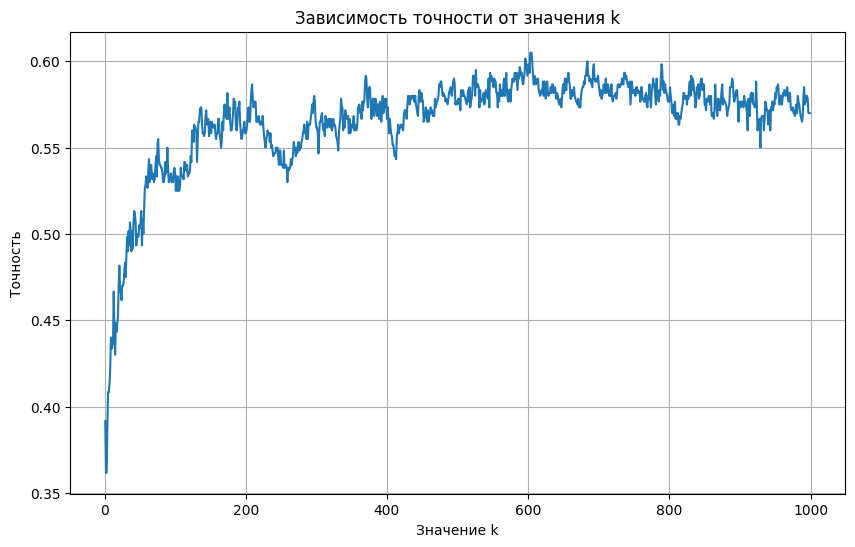

In [5]:

import matplotlib.pyplot as plt
# Задаем диапазон значений k, которые хотим проверить
k_values = range(1, 1000)

# Создаем пустой список для сохранения точности для каждого значения k
accuracy_scores = []

# Перебираем каждое значение k

maknn = 0
parameter_knn = 1
for k in range(1, 1000):
    # Создаем модель классификатора k ближайших соседей
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Обучаем модель на обучающем наборе
    knn.fit(x_train, y_train)
    
    # Предсказываем классы для тестового набора
    y_pred = knn.predict(x_test)
    
    # Вычисляем точность на тестовом наборе
    accuracy = accuracy_score(y_test, y_pred)
    if maknn < accuracy: 
        maknn = accuracy
        parameter_knn = k
    accuracy_scores.append(accuracy)

# Строим график зависимости точности от значения k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores)
plt.title('Зависимость точности от значения k')
plt.xlabel('Значение k')
plt.ylabel('Точность')
# plt.xticks(k_values)
plt.grid(True)
plt.show()

Построим график зависимости от максимального количества итераций к точности

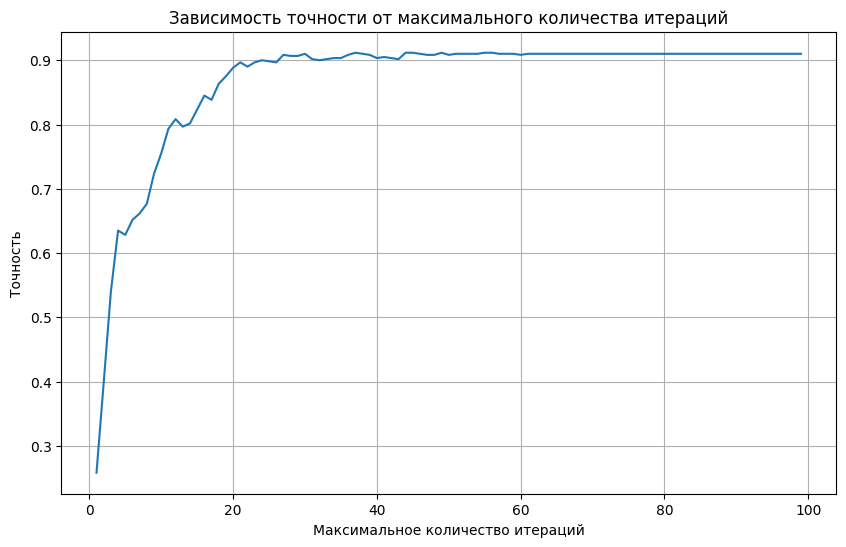

In [6]:
iter_values = range(1, 100)

accuracy_scores = []

malog = 0
parameter_log = 1
for k in iter_values:
    
    logreg = LogisticRegression(max_iter=k)
    
    logreg.fit(x_train, y_train)
    
    y_pred = logreg.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    if (malog < accuracy):
        malog = accuracy
        parameter_log = k
    
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(iter_values, accuracy_scores)
plt.title('Зависимость точности от максимального количества итераций')
plt.xlabel('Максимальное количество итераций')
plt.ylabel('Точность')
plt.grid(True)
plt.show()

Построим график зависимости от максимальной высоты дерева к точности

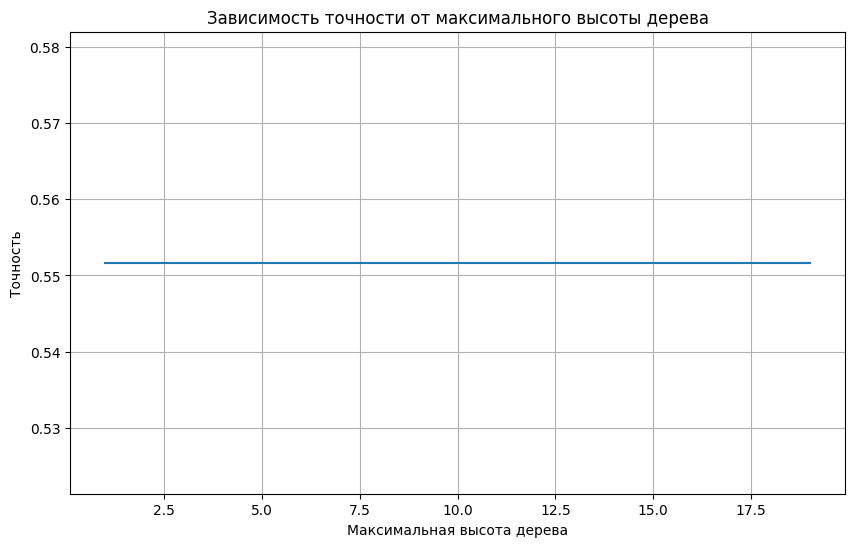

In [7]:
tree_values = range(1, 20)

accuracy_scores = []

matree = 0
parameter_tree = 0

for k in tree_values:
    
    tree = DecisionTree(features, max_depth = k)
    
    tree.fit(x_train, y_train)
    
    y_pred = tree.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    if matree < accuracy:
        matree = accuracy
        parameter_tree = k
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(tree_values, accuracy_scores)
plt.title('Зависимость точности от максимального высоты дерева')
plt.xlabel('Максимальная высота дерева')
plt.ylabel('Точность')
plt.grid(True)
plt.show()



Проверим, что будет если не ограничивать максимальтую высоту

In [8]:
tree = DecisionTree(features)
    
tree.fit(x_train, y_train)
    
y_pred = tree.predict(x_test)
    
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5516666666666666


Выведем точности которые у нас получились

In [10]:
print("Метод ближайшего соседа максимальная accuracy = ", maknn)
print("Достигается при гиперпараметре = ", parameter_knn)
print("\n")
print("Логическа регрессия accuracy = ", malog)
print("Достигается при гиперпараметре = ", parameter_log)
print("\n")
print("Дерево решений accuracy = ", matree)
print("Достигается при гиперпараметре = ", parameter_tree)

Метод ближайшего соседа максимальная accuracy =  0.605
Достигается при гиперпараметре =  603


Логическа регрессия accuracy =  0.9116666666666666
Достигается при гиперпараметре =  37


Дерево решений accuracy =  0.5516666666666666
Достигается при гиперпараметре =  1
